In [64]:
import pandas as pd

# load the csv file into a pandas dataframe
df = pd.read_csv('test1.csv')

# print the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 136 entries, (198, 281, 198, 274, 196, 273, 195, 272, 200, 275, 201, 275, 201, 275, 188, 272, 197, 277, 192, 286, 194, 287, 156, 302, 179, 312, 139, 364, 180, 373, 137, 407, 199) to (201, 261, 200, 255, 198, 254, 196, 253, 205, 257, 207, 257, 209, 258, 190, 254, 209, 261, 196, 264, 202, 267, 150, 274, 212, 293, 118, 298, 185, 319, 148, 294, 172)
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   nose              136 non-null    int64
 1   left_eye_inner    136 non-null    int64
 2   left_eye          136 non-null    int64
 3   left_eye_outer    136 non-null    int64
 4   right_eye_inner   136 non-null    int64
 5   right_eye         136 non-null    int64
 6   right_eye_outer   136 non-null    int64
 7   left_ear          136 non-null    int64
 8   right_ear         136 non-null    int64
 9   mouth_left        136 non-null    int64
 10  mouth_right       136 no

In [65]:
right_thumb_col = df['right_thumb']

In [104]:
print(len(right_thumb_col))
lst = right_thumb_col.tolist()
coordinates = [(lst[i], lst[i + 1]) for i in range(0, len(lst), 2)]
print(coordinates)

136
[(536, 534), (533, 536), (535, 534), (531, 532), (532, 529), (531, 532), (532, 530), (530, 534), (534, 534), (534, 534), (534, 535), (538, 539), (539, 539), (539, 538), (536, 535), (537, 538), (532, 543), (543, 539), (538, 539), (542, 542), (543, 537), (540, 538), (542, 543), (546, 546), (545, 549), (546, 546), (545, 548), (547, 550), (554, 552), (550, 549), (548, 551), (550, 551), (552, 552), (552, 551), (550, 552), (554, 551), (552, 553), (552, 551), (553, 555), (553, 554), (553, 553), (555, 553), (553, 551), (552, 548), (547, 544), (545, 543), (537, 535), (541, 540), (545, 539), (544, 544), (543, 543), (545, 545), (543, 542), (543, 544), (543, 546), (544, 544), (544, 545), (544, 543), (541, 544), (543, 542), (541, 540), (542, 539), (539, 539), (540, 539), (539, 538), (538, 537), (536, 535), (534, 534)]


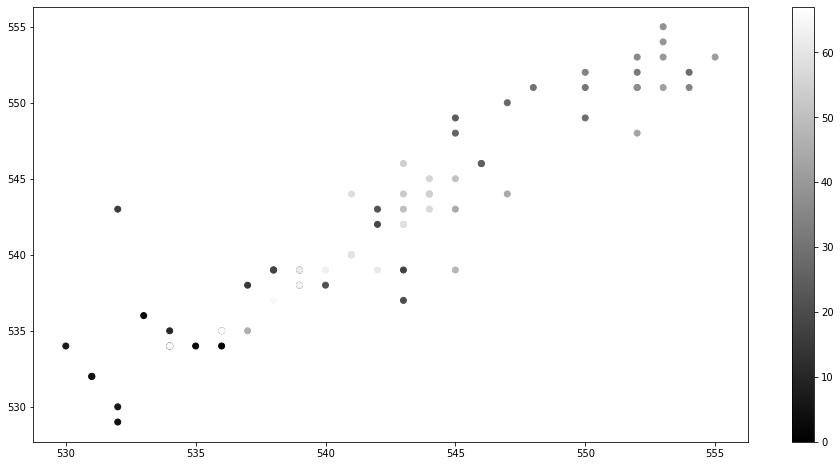

In [105]:
points = coordinates
# extract the x and y coordinates into separate lists
x_coords, y_coords = zip(*points)

# create a list of values that increases linearly with the index
c = np.arange(len(points))

# create a scatter plot with the color of the dots based on the index
plt.scatter(x_coords, y_coords, c=c, cmap='gray')

# add a colorbar
plt.colorbar()

# display the plot
plt.show()

In [96]:
import numpy as np
from scipy.signal import savgol_filter

# convert the coordinates to a numpy array
path = np.array(coordinates)

# smooth the path using a Savitzky-Golay filter
smoothed_path = savgol_filter(path, window_length=11, polyorder=2, axis=0)

# compute the first derivative of the path in both the x and y directions
dx = np.gradient(smoothed_path[:, 0])
dy = np.gradient(smoothed_path[:, 1])

# compute the sign of the x and y derivatives
dx_sign = np.sign(dx)
dy_sign = np.sign(dy)

# apply a threshold to the x derivative
dx_threshold = -0.5
dx_sign[dx < dx_threshold] = 0

# compute the mean of the y derivative over a sliding window of 10 frames
window_size = 10
y_deriv_mean = np.convolve(dy, np.ones(window_size), mode='same') / window_size

# determine if the point is moving to the left and rising
is_moving_left_and_rising = (dx_sign[-1] == -1) and (y_deriv_mean[-1] > 0)

print('Is the point moving to the left and rising?', is_moving_left_and_rising)


Is the point moving to the left and rising? False


In [97]:
coords_list = right_thumb_col.tolist()

In [98]:
x_values = smoothed_path[::2]
y_values = smoothed_path[1::2]

In [99]:
smoothed_path
x_values = [pt[0] for pt in smoothed_path]
y_values = [pt[1] for pt in smoothed_path]

In [100]:
import os
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [16, 8]

In [101]:
max_x_deviation = max(x_values) - min(x_values)
max_y_deviation = max(y_values) - min(y_values)
print(max_x_deviation)
print(max_y_deviation)

22.522144522144572
22.561771561771707


IndexError: list index out of range

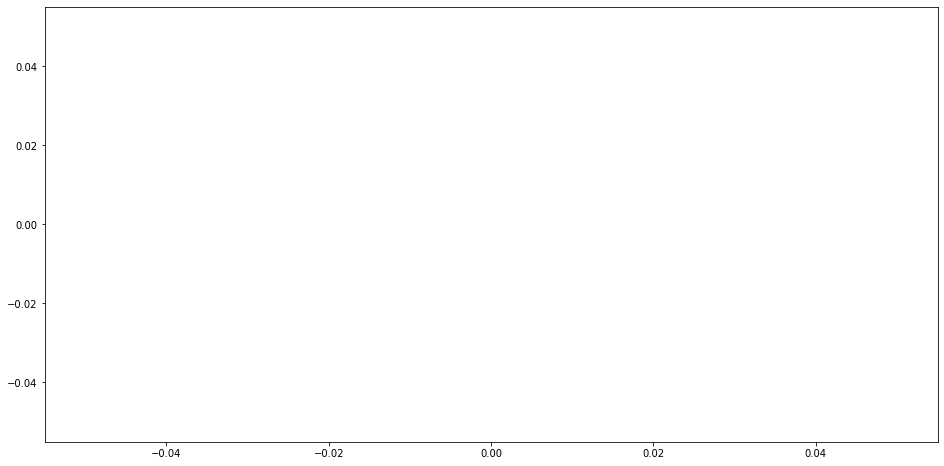

In [103]:
x1_values = [pt[0] for pt in coordinates]
y1_values = [pt[1] for pt in coordinates]
plt.plot(x_values[80:90], y_values[80:90])
x_values[90]

In [23]:
values = coords_list
coords = [(values[i], values[i + 1]) for i in range(0, len(values), 2)]

In [24]:
print(coords[0])

(536, 534)


In [25]:
pairs = coords

In [26]:
# create a list to store the running averages
averages = [pairs[0]]

# calculate the running averages
for i in range(1, len(pairs)):
    x_avg = (pairs[i][0] + pairs[i-1][0]) / 2
    y_avg = (pairs[i][1] + pairs[i-1][1]) / 2
    averages.append((x_avg, y_avg))

# print the running averages
print('running averages:', averages)


running averages: [(536, 534), (534.5, 535.0), (534.0, 535.0), (533.0, 533.0), (531.5, 530.5), (531.5, 530.5), (531.5, 531.0), (531.0, 532.0), (532.0, 534.0), (534.0, 534.0), (534.0, 534.5), (536.0, 537.0), (538.5, 539.0), (539.0, 538.5), (537.5, 536.5), (536.5, 536.5), (534.5, 540.5), (537.5, 541.0), (540.5, 539.0), (540.0, 540.5), (542.5, 539.5), (541.5, 537.5), (541.0, 540.5), (544.0, 544.5), (545.5, 547.5), (545.5, 547.5), (545.5, 547.0), (546.0, 549.0), (550.5, 551.0), (552.0, 550.5), (549.0, 550.0), (549.0, 551.0), (551.0, 551.5), (552.0, 551.5), (551.0, 551.5), (552.0, 551.5), (553.0, 552.0), (552.0, 552.0), (552.5, 553.0), (553.0, 554.5), (553.0, 553.5), (554.0, 553.0), (554.0, 552.0), (552.5, 549.5), (549.5, 546.0), (546.0, 543.5), (541.0, 539.0), (539.0, 537.5), (543.0, 539.5), (544.5, 541.5), (543.5, 543.5), (544.0, 544.0), (544.0, 543.5), (543.0, 543.0), (543.0, 545.0), (543.5, 545.0), (544.0, 544.5), (544.0, 544.0), (542.5, 543.5), (542.0, 543.0), (542.0, 541.0), (541.5, 5

In [29]:
avg_x_values = [pt[0] for pt in averages]
avg_y_values = [pt[1] for pt in averages]

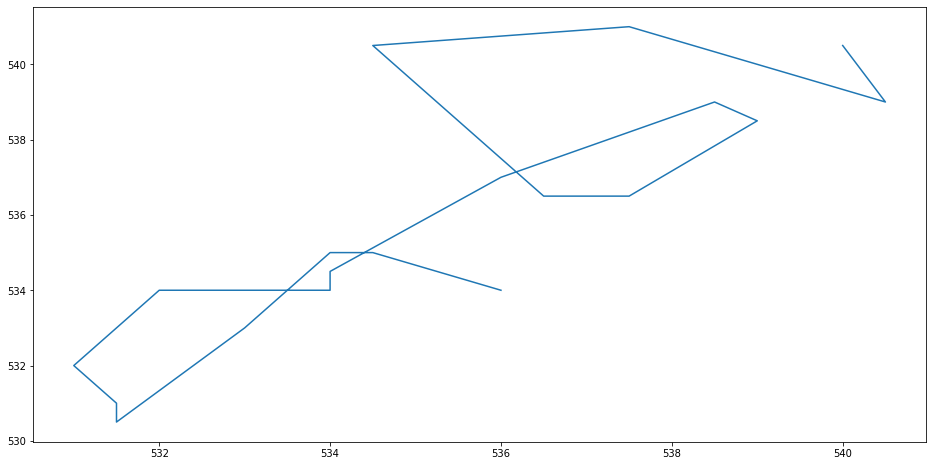

In [31]:
plt.plot(avg_x_values[0:20], avg_y_values[0:20])

In [32]:
pairs

[(536, 534),
 (533, 536),
 (535, 534),
 (531, 532),
 (532, 529),
 (531, 532),
 (532, 530),
 (530, 534),
 (534, 534),
 (534, 534),
 (534, 535),
 (538, 539),
 (539, 539),
 (539, 538),
 (536, 535),
 (537, 538),
 (532, 543),
 (543, 539),
 (538, 539),
 (542, 542),
 (543, 537),
 (540, 538),
 (542, 543),
 (546, 546),
 (545, 549),
 (546, 546),
 (545, 548),
 (547, 550),
 (554, 552),
 (550, 549),
 (548, 551),
 (550, 551),
 (552, 552),
 (552, 551),
 (550, 552),
 (554, 551),
 (552, 553),
 (552, 551),
 (553, 555),
 (553, 554),
 (553, 553),
 (555, 553),
 (553, 551),
 (552, 548),
 (547, 544),
 (545, 543),
 (537, 535),
 (541, 540),
 (545, 539),
 (544, 544),
 (543, 543),
 (545, 545),
 (543, 542),
 (543, 544),
 (543, 546),
 (544, 544),
 (544, 545),
 (544, 543),
 (541, 544),
 (543, 542),
 (541, 540),
 (542, 539),
 (539, 539),
 (540, 539),
 (539, 538),
 (538, 537),
 (536, 535),
 (534, 534)]

In [48]:
# create a list to store the smoothed pairs
pairs = averages
smoothed_pairs = [pairs[0]]

# calculate the smoothed pairs
for i in range(1, len(pairs)):
    prev_pair = smoothed_pairs[-1]
    diff_x = pairs[i][0] - prev_pair[0]
    diff_y = pairs[i][1] - prev_pair[1]
    new_x = prev_pair[0] + max(min(diff_x, 15), 5) if diff_x >= 0 else prev_pair[0] + min(max(diff_x, -15), -5)
    new_y = prev_pair[1] + max(min(diff_y, 15), 5) if diff_y >= 0 else prev_pair[1] + min(max(diff_y, -15), -5)
    smoothed_pairs.append((new_x, new_y))

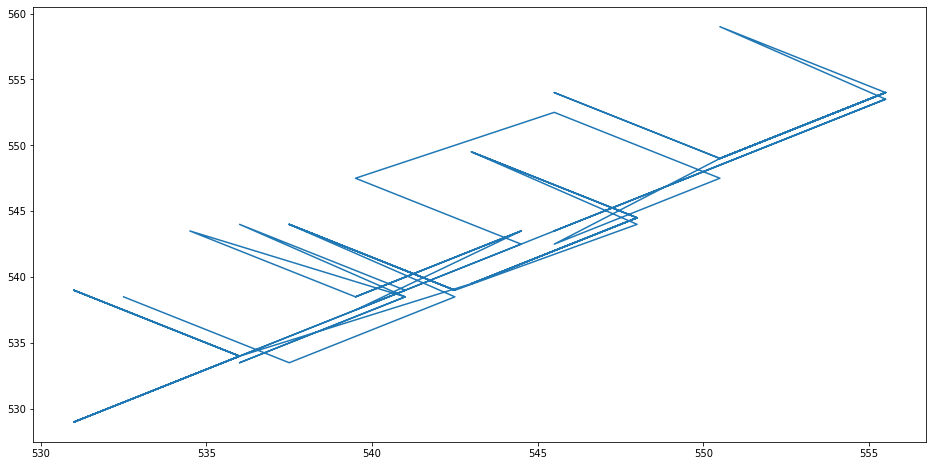

In [49]:
plt.plot([pt[0] for pt in smoothed_pairs][0:67], [pt[1] for pt in smoothed_pairs][0:67])